In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

# Formatos de Datos - CSV

Graficar las curvas correspondientes a cada percentil para niños y niñas 
1. En la columna Sex, 1 representa a niños y 2 a niñas
2. Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo
gráfico
3. Un gráfico para cada sexo


In [2]:
url = "https://www.cdc.gov/growthcharts/data/zscore/wtageinf.csv"
dataset = pd.read_csv (url)

In [3]:
dataset.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.00,1.82,3.53,0.15,2.36,2.53,2.77,3.15,3.53,3.88,4.17,4.34,4.45
1,1,0.50,1.55,4.00,0.15,2.80,2.96,3.21,3.60,4.00,4.39,4.72,4.91,5.03
2,1,1.50,1.07,4.88,0.14,3.61,3.77,4.02,4.43,4.88,5.33,5.73,5.97,6.12
3,1,2.50,0.70,5.67,0.13,4.34,4.50,4.75,5.18,5.67,6.18,6.64,6.92,7.11
4,1,3.50,0.42,6.39,0.12,4.99,5.16,5.42,5.87,6.39,6.94,7.46,7.78,7.99


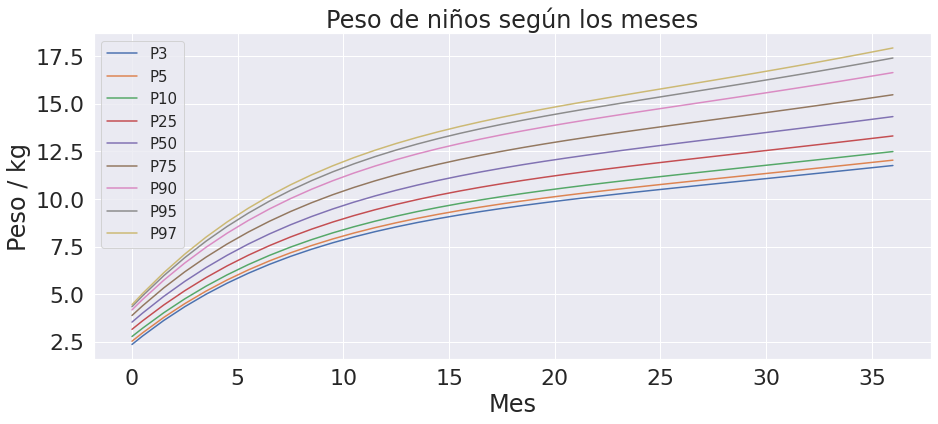

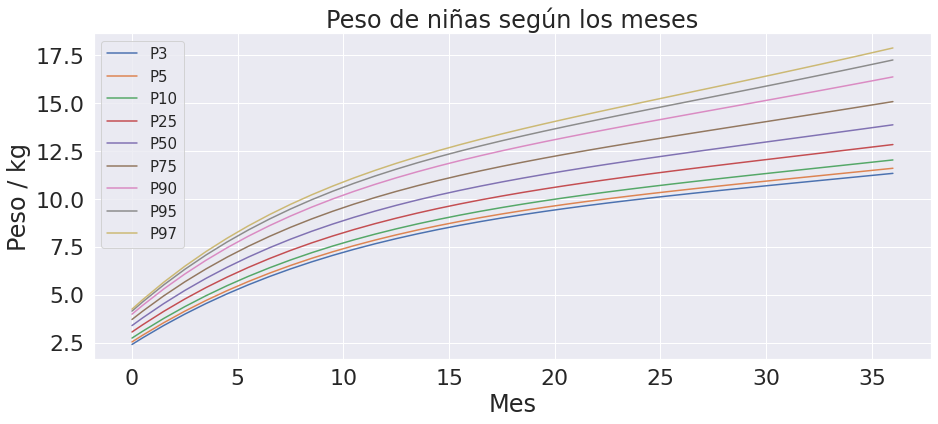

In [4]:
is_boy = dataset["Sex"] == 1
plt.figure(figsize=(15,6))
sns.set(font_scale=2)
for i in list(dataset.columns[5:]):
    sns.lineplot(data=dataset[is_boy], x="Agemos", y = i, label = i)
plt.ylabel("Peso / kg")
plt.xlabel("Mes")
plt.title("Peso de niños según los meses")
plt.legend(fontsize='15')
plt.show()

is_girl = dataset["Sex"] == 2
plt.figure(figsize=(15,6))
sns.set(font_scale=2)
for i in list(dataset.columns[5:]):
    sns.lineplot(data=dataset[is_girl], x="Agemos", y = i, label = i)
plt.ylabel("Peso / kg")
plt.xlabel("Mes")
plt.title("Peso de niñas según los meses")
plt.legend(fontsize='15')
plt.show()

# Formato de Datos - JSON

Graficar un gráfico de barras agrupando por valor del atributo “province”

In [5]:
dataset_json = pd.read_json("https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json")

In [6]:
dataset_json.head()

,province,location,name
0,Tierra del Fuego,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA )
1,Tierra del Fuego,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA
2,Tierra del Fuego,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA)
3,Tierra del Fuego,"[-54.8019121, -68.3029511]",PUERTO USHUAIA
4,Santa Cruz,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS


In [7]:
dataset_json['province'].value_counts()

Buenos Aires                                                48
Misiones                                                    38
Santa Cruz                                                  20
Corrientes                                                  15
Chubut                                                      15
Mendoza                                                     14
Entre Rios                                                  13
Formosa                                                     11
Santa Fe                                                    11
Neuquen                                                     10
Tierra del Fuego                                             9
Jujuy                                                        8
Rio Negro                                                    8
San Juan                                                     5
Salta                                                        4
Santiago del Estero                                    

In [8]:
dataset_json_c = dataset_json
dataset_json_c.province = dataset_json_c.province.replace(
["NEUQUEN", "Cordoba", "AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ"] ,
["Neuquen", "Córdoba", "Santa Cruz"])  #Este aeropuerto pertenece a la provincia de Santa Cruz

Text(0, 0.5, 'Provincia')

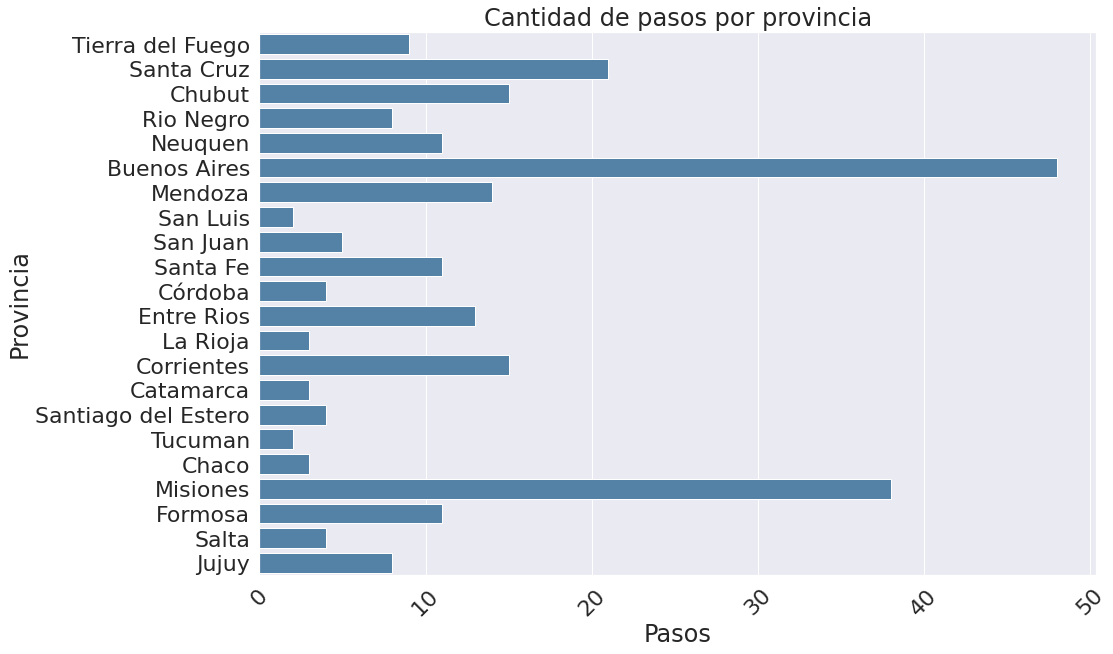

In [9]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
sns.countplot(data=dataset_json_c, y = "province", color="steelblue")
plt.xticks(rotation=45)
plt.title('Cantidad de pasos por provincia')
plt.xlabel('Pasos')
plt.ylabel('Provincia')

# Representación de Datos - Grafos

In [10]:
edgeList = [[0,2],[1,3],[2,3],[2,4],[3,5],[4,5]]
adjList = [[2],[3],[3,4],[5],[5],[]]

In [11]:
from scipy.sparse import lil_matrix

lenList = len(adjList)
A = lil_matrix((lenList, lenList))
for j in range(lenList):
    A[j,adjList[j]] =1
print(A)

  (0, 2)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 5)	1.0


# Limpieza de Datos

Realizar todos los ejercicios del notebook Limpieza.ipynb

In [12]:
kickstarter_2018 = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

## Asegurar de tener ids/claves únicas

#### Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [13]:
duplicated_names = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)]
duplicated_names

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000940032,Space Trucker,Video Games,Games,USD,2016-12-08,150.00,2016-11-08 08:20:27,165.00,successful,7,US,25.00,165.00,150.00
1001052357,Spilt Milk,Graphic Novels,Comics,AUD,2017-01-08,18000.00,2016-12-09 04:00:31,832.00,failed,23,AU,375.22,623.55,13490.22
1001110351,Kingdoms of Erden: King of the Mountain,Tabletop Games,Games,USD,2017-07-27,1000.00,2017-06-26 15:52:31,745.00,canceled,52,US,316.00,745.00,1000.00
10018239,Borders,Drama,Film & Video,GBP,2016-04-08,3500.00,2016-02-25 17:40:34,40.00,failed,2,GB,55.93,56.30,4926.39
1002139540,The Kindness of Strangers,Nonfiction,Publishing,USD,2014-09-15,3021.00,2014-08-31 20:40:19,113.00,failed,5,US,113.00,113.00,3021.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997542782,Innocent Sin,Indie Rock,Music,USD,2015-01-25,300.00,2014-12-26 18:04:28,600.00,successful,15,US,600.00,600.00,300.00
997919903,Grassroots,Publishing,Publishing,EUR,2017-09-14,10000.00,2017-08-15 18:36:18,21.00,failed,3,IE,0.00,25.12,11963.01
998836498,The InAction,Camera Equipment,Technology,USD,2016-07-29,80000.00,2016-06-28 04:00:08,670.00,canceled,5,US,410.00,670.00,80000.00


In [15]:
len(duplicated_names),len(duplicated_names['name'].unique())

(5125, 2229)

Vemos que existen 2229 nombres que se repiten entre 5125 proyectos

## Despersonalizar datos y guardarlos en un nuevo archivo

#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [17]:
from hashlib import md5

def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


kickstarter_2018['name'].apply(hashit)

ID
1000002330    a6828ae8a2eca25f0dd7035efc0af0a0
1000003930    81609b3bdc0b96f429672d69702f2524
1000004038    c12f5c3bace2f0213cdb2679a265dca0
1000007540    4dbdcf09c86bbf5683ec39bc57b77f81
1000011046    9c01404a2ef702811c2088ce139042ad
                            ...               
999976400     d89228576343394467096843057f3aa4
999977640     bbcb30bd9bd4f9bff0a96fc44d0001f0
999986353     6c3094666e1a315b6e179566fe3972d9
999987933     887be409ad8b93f26084845a41d4c178
999988282     11f7ae3385c567df409deb5f4ac9a2a5
Name: name, Length: 378661, dtype: object

In [19]:
if len(kickstarter_2018.name[kickstarter_2018.name.duplicated(keep=False)]) == len(kickstarter_2018.name[kickstarter_2018.name.apply(hashit).duplicated(keep=False)]):
    print("Todos los nombres duplicados también tienen el hash de nombre duplicado")
else:
    print("Algún nombre duplicado no tiene el hash") #Controlar

Todos los nombres duplicados también tienen el hash de nombre duplicado


## Encoding

Reemplazamos los caracteres con problemas de codificación en los nombres de las columnas, en este caso los espacios en usd pledged

In [20]:
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index(['usd pledged'], dtype='object')

In [21]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [22]:
import ftfy.badness as bad

In [23]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [24]:
kickstarter_2018_iso = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/kickstarter-projects/ks-projects-201801-for-pandas.csv",
                        index_col='ID',
                        parse_dates=['deadline','launched'],
                        encoding = 'iso-8859-1')

In [37]:
kickstarter_2018_iso['name_weirdness'] = kickstarter_2018_iso['name'].apply(weird)
num = kickstarter_2018_iso[kickstarter_2018_iso['name_weirdness'] > 1][['name','name_weirdness']].shape[0]
kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
num2 = kickstarter_2018[kickstarter_2018['name_weirdness']>1].shape[0]

print('Cantidad de nombres raros detectados con el encoding iso-8859-1:',num)
print('Cantidad de nombres raros detectados con el encoding UTF-8:',num2)

Cantidad de nombres raros detectados con el encoding iso-8859-1: 7699
Cantidad de nombres raros detectados con el encoding UTF-8: 26


## Tratar valores faltantes

In [38]:
# get the number of missing data points per column
missing_values_count = kickstarter_2018.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

name              4
usd_pledged    3797
dtype: int64

In [39]:
#cuantos de los proyectos suspendidos no tienen nombre
len(kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])) / \
    len(kickstarter_2018[kickstarter_2018.state == 'suspended'])

0.9994582881906826

En este caso, creemos que es seguro descartar los proyectos sin nombre

In [40]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

In [41]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
count,3797,3797,3797,3797,3797,3797.00,3797,3797.00,3797,3797.00,3797,0.00,3797.00,3797.00,3797.00
unique,3764,28,12,10,722,nan,3797,nan,6,nan,1,nan,nan,nan,nan
top,New EP/Music Development,Music,Music,USD,2015-05-01 00:00:00,nan,2015-10-27 17:00:11,nan,undefined,nan,"N,0""",nan,nan,nan,nan
freq,28,2387,2388,2738,26,nan,1,nan,3562,nan,3797,nan,nan,nan,nan
first,NaN,NaN,NaN,NaN,2012-04-24 00:00:00,nan,2012-03-14 19:05:44,nan,NaN,nan,NaN,nan,nan,nan,nan
last,NaN,NaN,NaN,NaN,2016-07-07 00:00:00,nan,2016-05-21 20:45:12,nan,NaN,nan,NaN,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,5413.35,NaN,3023.26,NaN,0.00,NaN,nan,2949.85,5097.31,-0.01
std,NaN,NaN,NaN,NaN,NaN,37466.24,NaN,44919.41,NaN,0.00,NaN,nan,44881.72,37258.79,0.12
min,NaN,NaN,NaN,NaN,NaN,108.00,NaN,0.00,NaN,0.00,NaN,nan,0.00,85.28,-3.00
25%,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,5.00,NaN,0.00,NaN,nan,5.00,2250.00,0.00


In [42]:
kickstarter_2018 = kickstarter_2018.fillna(0)
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

## Codificar variables categóricas

#### Ejercicio 4

Para trabajar con los algoritmos de aprendizaje automático, las variables categóricas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

Codificar `currency` con ambas estrategias

In [43]:
from sklearn import preprocessing

In [44]:
# Primero con estrategia LabelEncoder (Encode target labels with value between 0 and n_classes-1.)
le = preprocessing.LabelEncoder()
le.fit(kickstarter_2018['currency'])

LabelEncoder()

In [45]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [46]:
# Ahora con el método LabelBinarizer
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(kickstarter_2018['currency'])
pd.DataFrame(lb_results, columns=(('currency' + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Verificar la consistencia de las variables
Aplicar reglas de integridad

#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [47]:
print("Proporción de proyectos que no lograron el objetivo pero son exitosos: ", 
      '{0:.5f}'.format(len(kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]) / len(kickstarter_2018[(kickstarter_2018.state == 'successful')])))
print("Proporción de proyectos que sí lograron el objetivo pero son exitosos: ", 
      '{0:.5f}'.format(len(kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged >= kickstarter_2018.goal)]) / len(kickstarter_2018[(kickstarter_2018.state == 'successful')])))

Proporción de proyectos que no lograron el objetivo pero son exitosos:  0.00004
Proporción de proyectos que sí lograron el objetivo pero son exitosos:  0.99996


Rta 1.: Sólo 5 proyectos exitosos no consiguieron el objetivo. Por lo tanto, de todos los proyectos exitosos, un porcentaje muy pequeño.

In [48]:
kickstarter_2018.pivot_table(index='state', columns='main_category', aggfunc = 'count') #REVISAR

backers                                                         \
main_category      Art  Comics  Crafts   Dance   Design  Fashion Film & Video   
state                                                                           
canceled       2222.00  842.00  843.00  163.00  4152.00  2650.00      5755.00   
failed        14130.00 4036.00 5703.00 1235.00 14814.00 14182.00     32903.00   
live            194.00   76.00   76.00   18.00   305.00   250.00       332.00   
successful    11510.00 5842.00 2115.00 2338.00 10550.00  5593.00     23623.00   
suspended        96.00   23.00   72.00   13.00   246.00   138.00       117.00   
undefined          nan     nan     nan    1.00     2.00     3.00       854.00   

                                            ... usd_pledged_real               \
main_category     Food    Games Journalism  ...          Fashion Film & Video   
state                                       ...                                 
canceled       2211.00  6202.00     523.00  ...          2650.00      5755.00   
failed        15969.00 16002.00    3137.00  ...         14182.00     32903.00   
live            184.00   287.00      31.00  ...           250.00       332.00   
successful     6085.00 12518.00    1012.00  ...          5593.00     23623.00   
suspended       153.00   220.00      52.00  ...           138.00       117.00   
undefined          nan     1.00        nan  ...             3.00       854.00   

                                                                            \
main_category     Food    Games Journalism    Music Photography Publishing   
state                                                                        
canceled       2211.00  6202.00     523.00  3305.00      986.00    3602.00   
failed        15969.00 16002.00    3137.00 21752.00     6384.00   23145.00   
live            184.00   287.00      31.00   281.00       48.00     299.00   
successful     6085.00 12518.00    1012.00 24197.00     3305.00   12300.00   
suspended       153.00   220.00      52.00   149.00       55.00      66.00   
undefined          nan     1.00        nan  2234.00        1.00     462.00   

                                  
main_category Technology Theater  
state                             
canceled         4715.00  608.00  
failed          20616.00 3708.00  
live              377.00   41.00  
successful       6434.00 6534.00  
suspended         424.00   21.00  
undefined           3.00    1.00  

[6 rows x 195 columns]

## Identificar y documentar valores atípicos/outliers

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [49]:
def outliers(database, variable):
    outliers = database[database[variable] >
                       (database[variable].mean() + 3 * database[variable].std())]
    return(outliers)

In [50]:
outliers_usd_goal_real = outliers(kickstarter_2018, 'usd_goal_real')
outliers_usd_goal_real

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.00,2014-06-21 22:34:21,285.00,failed,5,CA,263.41,264.67,3575408.62,0
1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.00,2015-07-07 21:14:52,0.00,failed,0,IT,0.00,0.00,5568982.99,0
1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.00,2016-02-27 13:08:01,15.00,failed,6,ES,16.59,17.10,17104542.97,-1
1025947904,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.00,2013-10-08 23:16:26,0.00,canceled,0,US,0.00,0.00,10000000.00,0
1029500715,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.00,2016-09-26 18:08:01,1.00,canceled,1,US,0.00,1.00,20000000.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992335258,XPOINT5 (Canceled),Web,Technology,USD,2015-11-09,5000000.00,2015-09-10 23:08:39,0.00,canceled,0,US,0.00,0.00,5000000.00,0
992624421,I don't know a comic book?,Comics,Comics,USD,2014-08-09,10000000.00,2014-07-10 06:11:48,10.00,failed,1,US,10.00,10.00,10000000.00,0
993969686,Albert Einstein Museum,Technology,Technology,USD,2014-12-20,50000000.00,2014-10-23 01:46:17,240.00,failed,8,US,240.00,240.00,50000000.00,0


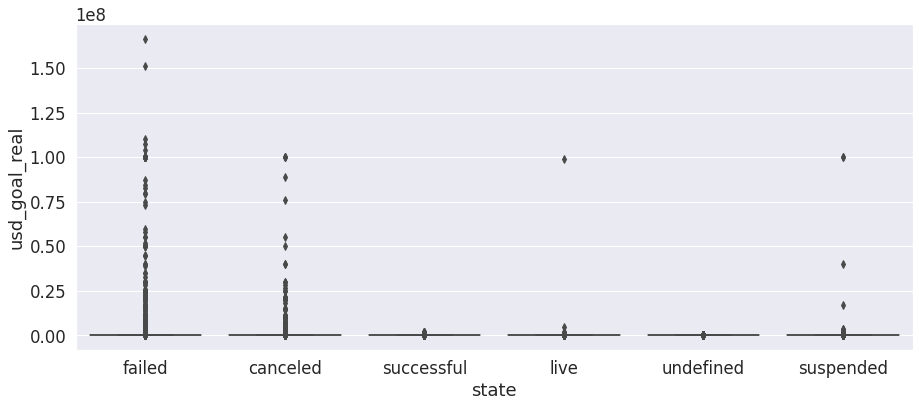

In [52]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
sns.boxplot(data=kickstarter_2018,x='state',y='usd_goal_real')

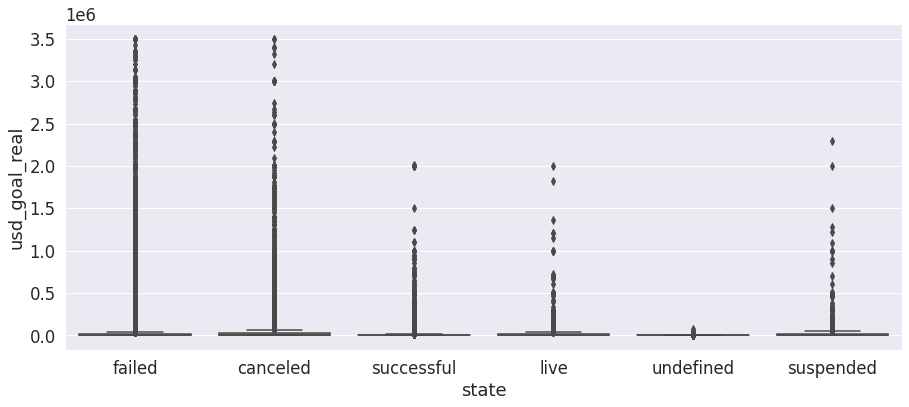

In [55]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
sns.boxplot(data=kickstarter_2018.drop(outliers(kickstarter_2018, 'usd_goal_real').index),x='state',y='usd_goal_real')

# Ingestión de Datos - SQL

1. Canciones de Iron Maiden
2. Discos con más de 25 canciones
3. Las 10 canciones más populares
4. Reescribir la siguiente consulta con JOIN:
                                            SELECT trackid, name
                                            FROM tracks
                                            WHERE albumid = (
                                            SELECT albumid
                                            FROM albums
                                            WHERE title = ‘Let There Be Rock’
                                            );

In [62]:
import sqlite3

In [65]:
sqlite3.connect("./chinook.db")

1)SELECT 
albums.*,
artists.Name
FROM albums
Inner Join artists on albums.ArtistId = artists.ArtistId;
where name='Iron Maiden';


2) SELECT * FROM tracks
WHERE 25 > TrackId
Group By AlbumId;

3)SELECT 
playlist_track.*,
tracks.name
FROM playlist_track
inner join tracks on playlist_track.TrackId = tracks.TrackId
group by PlaylistId
order by TrackId Desc;

#2 Canciones Iron Maiden
select distinct tracks.name as tracks, albums.title as albums
from tracks
inner join albums
using (AlbumId)
inner join artists
using (ArtistId)
where artists.name = 'Iron Maiden'

#3 Discos con mas de 25 canciones
select albums.title as Albums, count(tracks.name) as number_of_songs
from albums
join tracks
using (AlbumId)
group by albums.title
having number_of_songs > 25

#4 10 canciones mas populares
select tracks.name, count(invoice_items.invoiceid) as reproducciones
from tracks
join invoice_items
using (trackId)
group by tracks.name
order by reproducciones desc
limit 10

# Ingestión de Datos - RSS

In [56]:
import feedparser

In [57]:
feeds = ['https://www.lavoz.com.ar/rss/tecnologia.xml']
parsed = feedparser.parse(feeds[0])
posts = parsed.entries
for p in posts:
    print(p.title)

Con el 5G aún en pañales, Samsung tiene fecha estimada para la llegada del 6G
Descubren una app de chat para Android que espía a los usuarios y roba sus datos
Venden un Súper Mario Bros de 1985 precintado por U$S 114.000 y se convierte en el juego más caro del mundo
Apple aconseja no usar protectores para tapar la webcam de los MacBook: qué alternativas propone
Un ratito más: la pulsera de Fitbit despertará a los usuarios "en el mejor momento"
¿TikTok es divertido? El mundo lo ve como un asunto muy serio y con razón
Instagram prohibirá publicidades de "terapias de conversión" para personas LGTB
Microsoft toma el control de los dominios que usaban la Covid como anzuelo para estafas
Microsoft Teams: ahora los que estén en una videollamada podrán verse "uno al lado del otro"
Instagram permite fijar hasta tres comentarios en una publicación
Google Maps empieza a mostrar los semáforos en Android
TikTok se retirará en los próximos días de Hong Kong y EE.UU. estudia prohibir la red social chi